# feature engineering

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize

In [18]:
%store -r df

In [19]:
from sklearn.feature_selection import mutual_info_classif
target_variable = 'smoking'
features = ['age', 'relaxation', 'Gtp', 'triglyceride', 'eyesight(left)', 'ALT', 'height(cm)', 'weight(kg)', 'waist(cm)', 'systolic', 'HDL', 'hemoglobin']

# Create target variable (y) and feature matrix (X)
y = df[target_variable]
X = df[features]

# Calculate information gain
information_gain = mutual_info_classif(X, y)
feature_info_gain = pd.Series(information_gain, index=features).sort_values(ascending=False)

# Print or visualize feature importance
print(feature_info_gain)

height(cm)        0.138543
hemoglobin        0.135987
Gtp               0.099416
weight(kg)        0.079499
triglyceride      0.077260
waist(cm)         0.044767
HDL               0.039237
ALT               0.030738
age               0.027071
relaxation        0.014697
eyesight(left)    0.014371
systolic          0.009246
dtype: float64


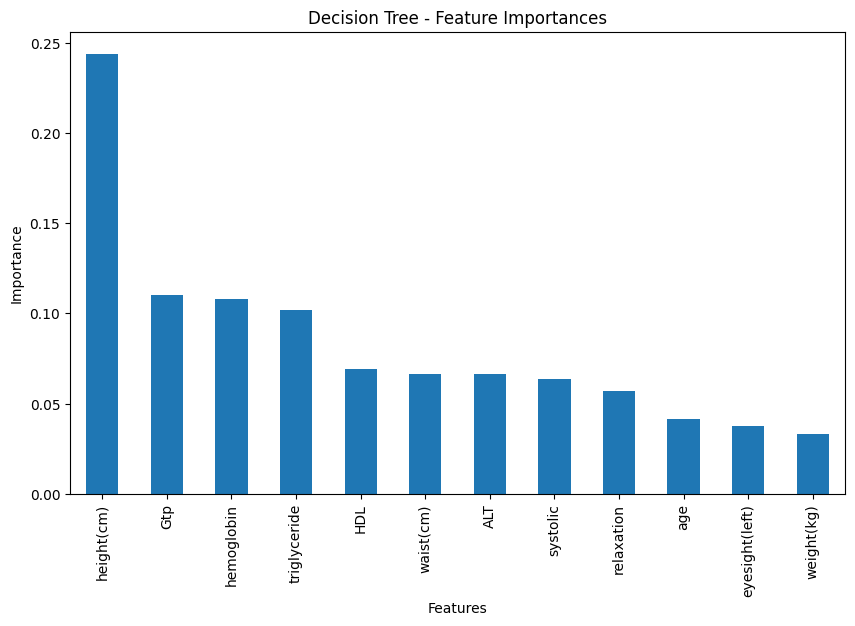

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Get feature importances
feature_importances = tree_model.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series = pd.Series(feature_importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance_series.plot(kind='bar')
plt.title('Decision Tree - Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

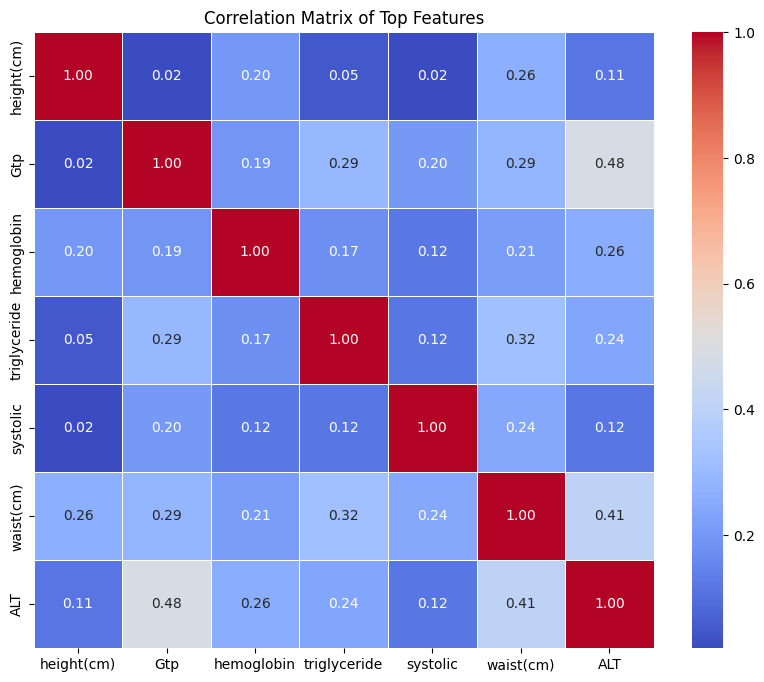

In [21]:
selected_features = ['height(cm)','Gtp', 'hemoglobin', 'triglyceride', 'systolic', 'waist(cm)','ALT']
extracted_features = df.loc[df['smoking'] == 1, selected_features].copy()
# Calculate correlation matrix
correlation_matrix = extracted_features.corr()

# Plotting the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Top Features')
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 44676 entries, 2 to 101922
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   height(cm)                       44676 non-null  float64
 1   Gtp                              44676 non-null  float64
 2   hemoglobin                       44676 non-null  float64
 3   triglyceride                     44676 non-null  float64
 4   systolic                         44676 non-null  float64
 5   waist(cm)                        44676 non-null  float64
 6   ALT                              44676 non-null  float64
 7   systolic_waist_size_interaction  44676 non-null  float64
dtypes: float64(8)
memory usage: 3.1 MB


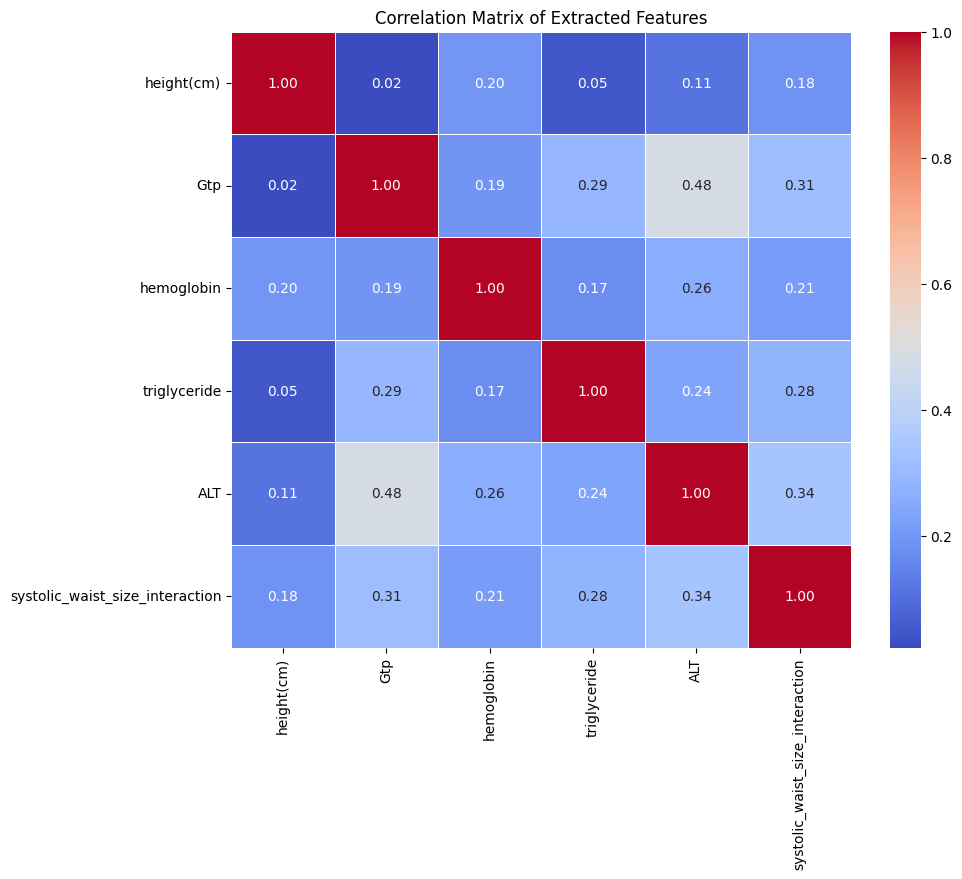

In [22]:
import seaborn as sns
extracted_features['systolic_waist_size_interaction'] = extracted_features['waist(cm)'] * extracted_features['systolic']
extracted_features.info()
extracted_features.drop(['systolic', 'waist(cm)'], axis=1, inplace=True)
correlation_matrix = extracted_features.corr()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Extracted Features')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


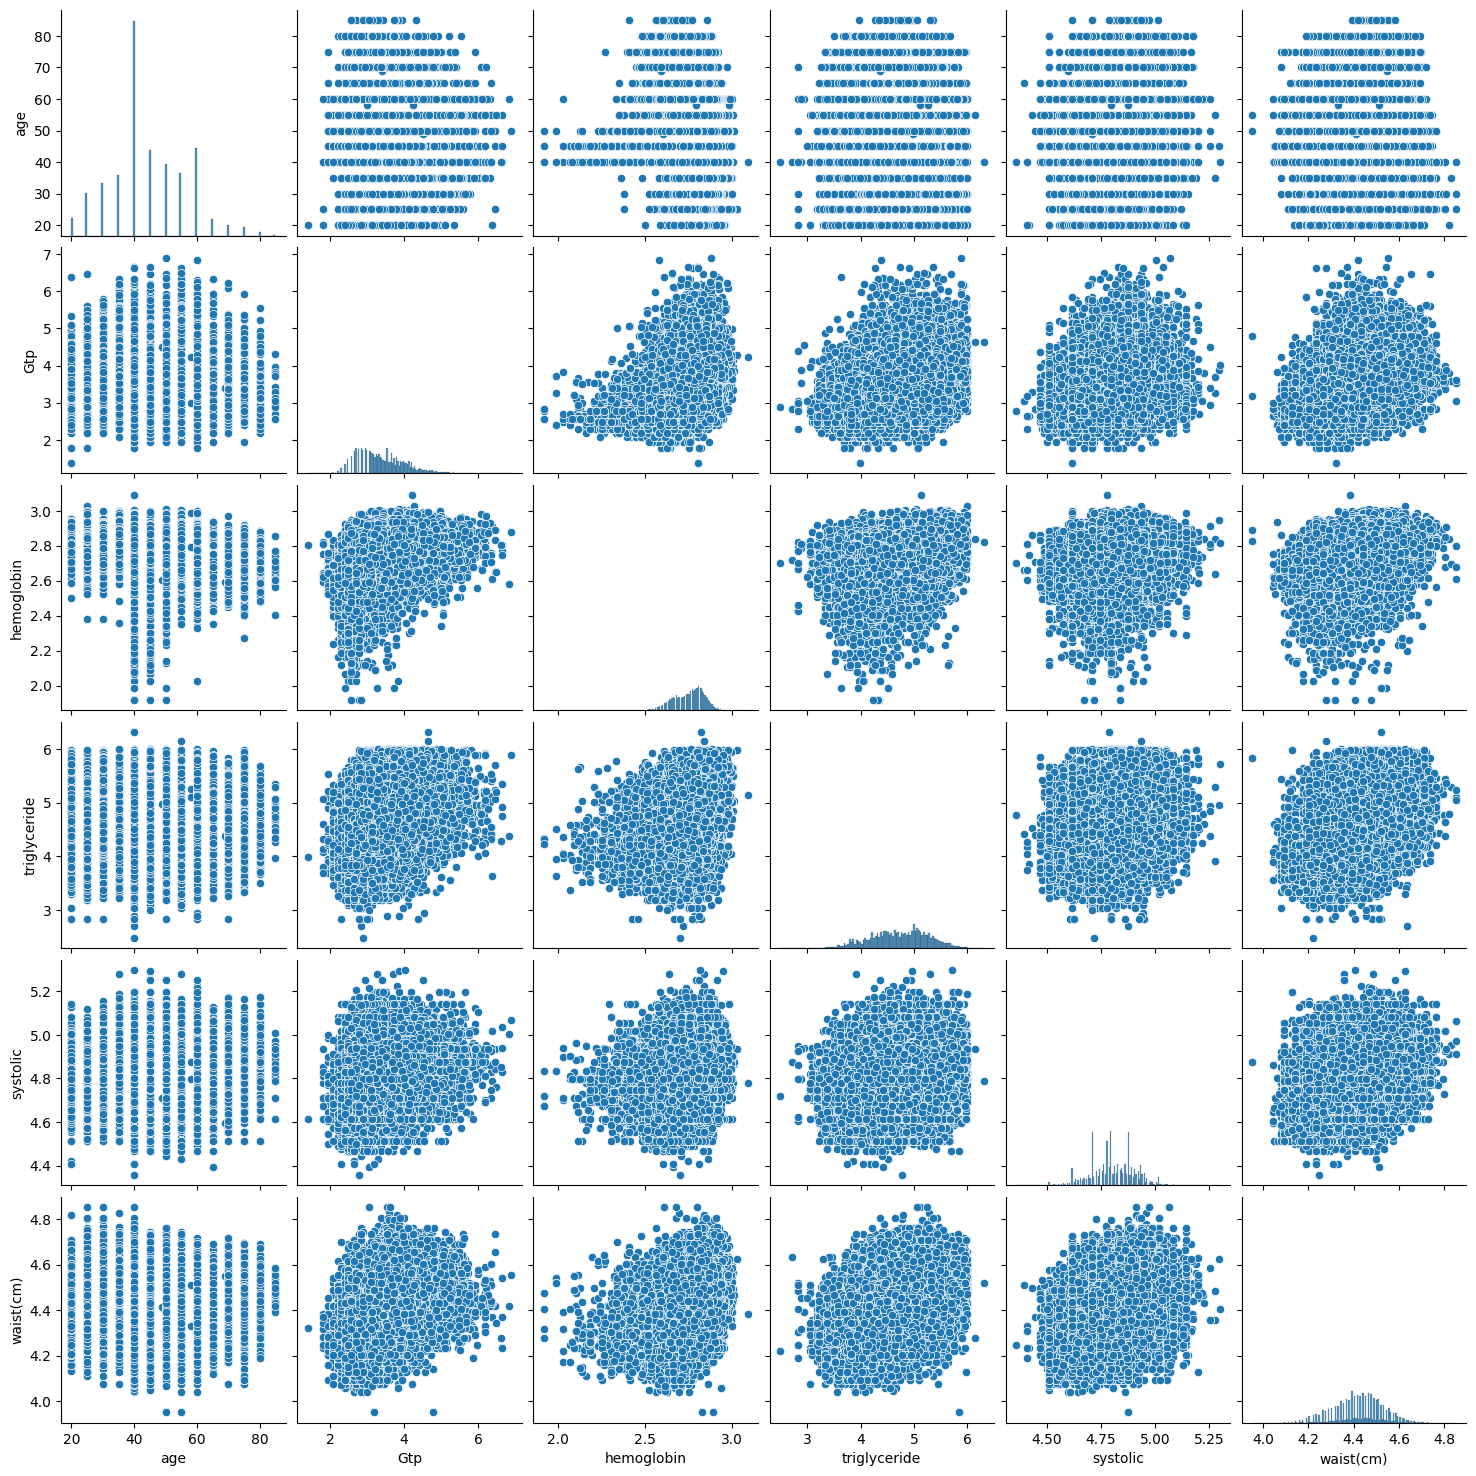

In [23]:
numeric_features = ['age','Gtp', 'hemoglobin', 'triglyceride', 'systolic', 'waist(cm)']
sns.pairplot(data=df[numeric_features])
plt.show()

In [24]:
# Log transform skewed numeric features
skewed_features = ['height(cm)','Gtp', 'hemoglobin', 'triglyceride', 'systolic', 'waist(cm)','ALT']
df[skewed_features] = np.log1p(df[skewed_features])

In [25]:
# winsorize the data(it drops the outliers)
df['height_winsorized'] = winsorize(df['height(cm)'], limits=[0.05, 0.05])
df['waist_winsorized'] = winsorize(df['waist(cm)'], limits=[0.05, 0.05])
df['Gtp_winsorized'] = winsorize(df['Gtp'], limits=[0.05, 0.05])
df['triglyceride_winsorized'] = winsorize(df['triglyceride'], limits=[0.05, 0.05])
df['systolic_winsorized'] = winsorize(df['systolic'], limits=[0.05, 0.05])
df['hemoglobin_winsorized'] = winsorize(df['hemoglobin'], limits=[0.05, 0.05])

In [26]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numeric_features])
df_scaled = pd.DataFrame(scaled_features, columns=numeric_features)

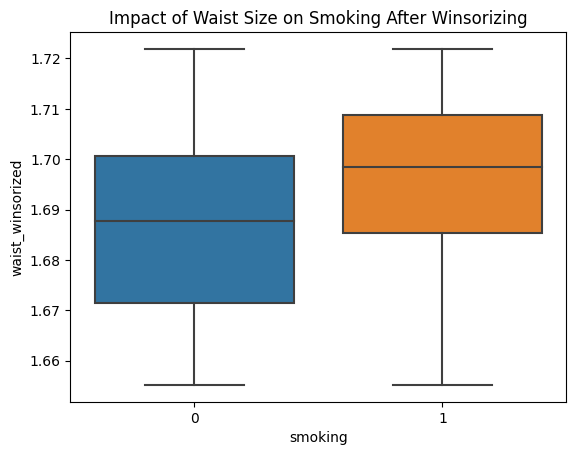

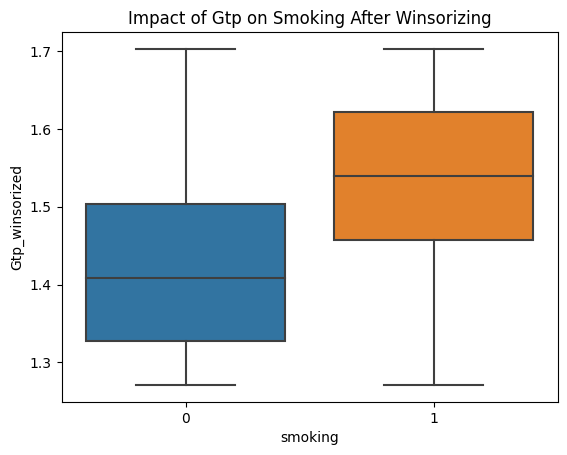

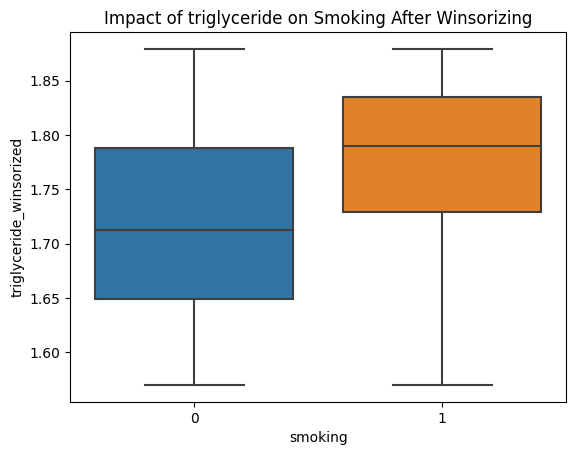

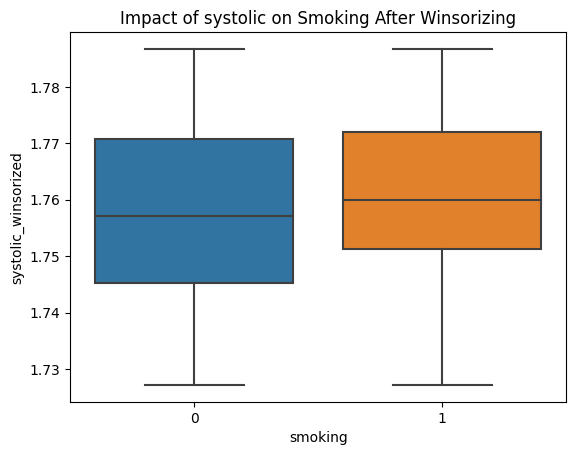

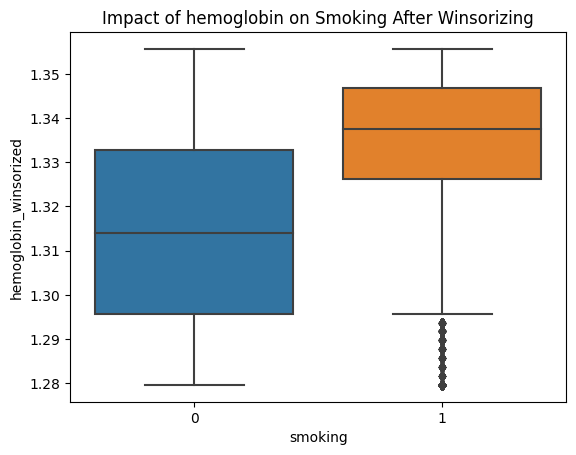

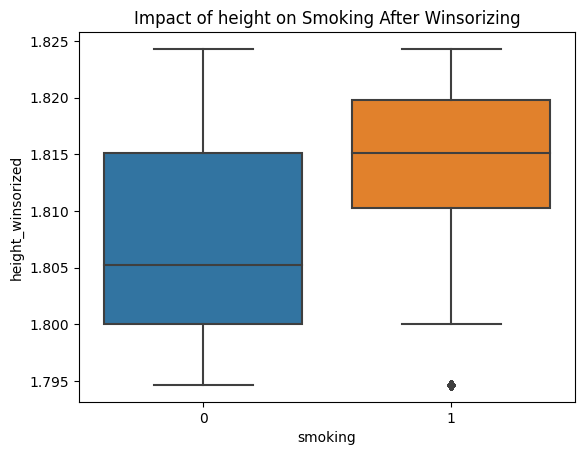

In [27]:
sns.boxplot(x='smoking', y='waist_winsorized', data=df)
plt.title('Impact of Waist Size on Smoking After Winsorizing')
plt.show()
sns.boxplot(x='smoking', y='Gtp_winsorized', data=df)
plt.title('Impact of Gtp on Smoking After Winsorizing')
plt.show()
sns.boxplot(x='smoking', y='triglyceride_winsorized', data=df)
plt.title('Impact of triglyceride on Smoking After Winsorizing')
plt.show()
sns.boxplot(x='smoking', y='systolic_winsorized', data=df)
plt.title('Impact of systolic on Smoking After Winsorizing')
plt.show()
sns.boxplot(x='smoking', y='hemoglobin_winsorized', data=df)
plt.title('Impact of hemoglobin on Smoking After Winsorizing')
plt.show()

sns.boxplot(x='smoking', y='height_winsorized', data=df)
plt.title('Impact of height on Smoking After Winsorizing')
plt.show()

In [28]:
new_def=df[['smoking','waist_winsorized','Gtp_winsorized','triglyceride_winsorized','systolic_winsorized','hemoglobin_winsorized','height_winsorized']]

%store new_def
new_def.describe()

Stored 'new_def' (DataFrame)


,smoking,waist_winsorized,Gtp_winsorized,triglyceride_winsorized,systolic_winsorized,hemoglobin_winsorized,height_winsorized
count,101923.000000,101923.000000,101923.000000,101923.000000,101923.000000,101923.000000,101923.000000
mean,0.438331,1.690970,1.474572,1.741417,1.759485,1.323661,1.810323
std,0.496185,0.018331,0.124333,0.087941,0.016271,0.021879,0.008411
min,0.000000,1.655196,1.271150,1.570003,1.727216,1.279615,1.794635
25%,0.000000,1.678350,1.372307,1.678350,1.748318,1.306880,1.805236
50%,0.000000,1.692090,1.466077,1.749824,1.758551,1.327761,1.810252
75%,1.000000,1.704713,1.570003,1.811234,1.770740,1.340611,1.815096
max,1.000000,1.721895,1.702680,1.879324,1.786716,1.355629,1.824307


<Figure size 1200x600 with 0 Axes>

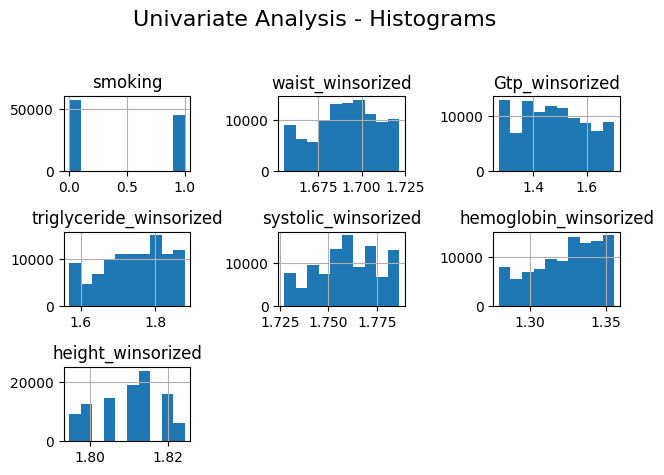

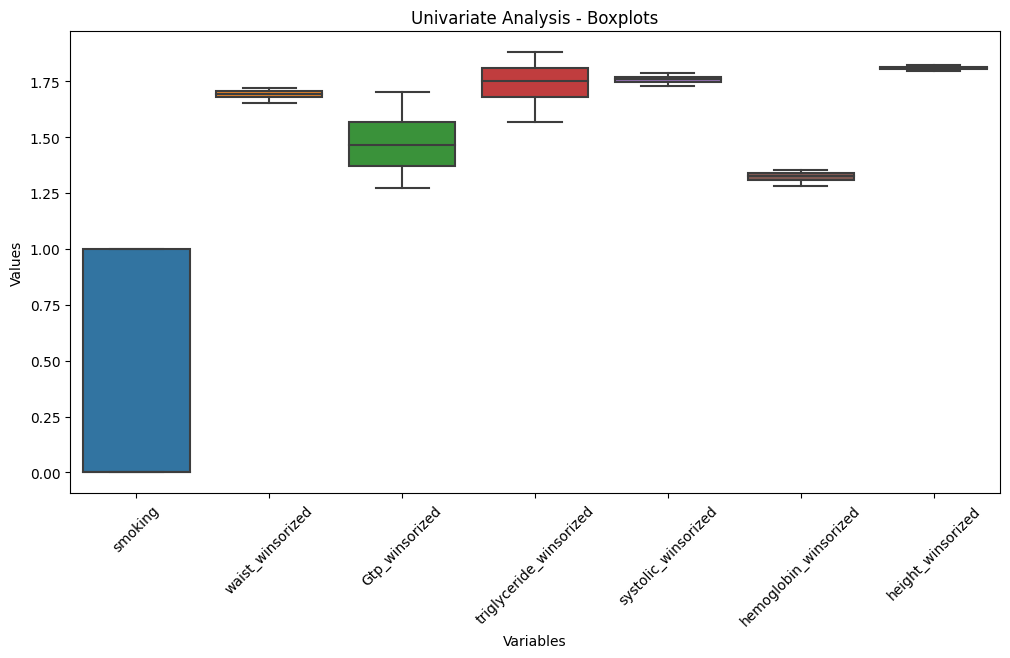

             smoking  waist_winsorized  Gtp_winsorized  \
count  101923.000000     101923.000000   101923.000000   
mean        0.438331          1.690970        1.474572   
std         0.496185          0.018331        0.124333   
min         0.000000          1.655196        1.271150   
25%         0.000000          1.678350        1.372307   
50%         0.000000          1.692090        1.466077   
75%         1.000000          1.704713        1.570003   
max         1.000000          1.721895        1.702680   

       triglyceride_winsorized  systolic_winsorized  hemoglobin_winsorized  \
count            101923.000000        101923.000000          101923.000000   
mean                  1.741417             1.759485               1.323661   
std                   0.087941             0.016271               0.021879   
min                   1.570003             1.727216               1.279615   
25%                   1.678350             1.748318               1.306880   
50%      

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate descriptive statistics
statistics = new_def.describe()

plt.figure(figsize=(12, 6))
new_def.hist()
plt.suptitle('Univariate Analysis - Histograms', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(data=new_def)
plt.title('Univariate Analysis - Boxplots')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# Print descriptive statistics
print(statistics)
